In [98]:
import math
from itertools import combinations

def dist(p1,p2):
    (x1,y1), (x2,y2)= p1,p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

x = [89.86, 23.0, 9.29, 55.47, 4.5, 59.0, 1.65, 56.2, 18.53, 40.0]
y = [78.65, 28.0, 63.43, 66.47, 68.0, 69.5, 86.26, 84.2, 88.0, 111.0]

points = list(zip(x,y))


In [99]:
distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
avg_distance = sum(distances) / len(distances)

46.80149414881192


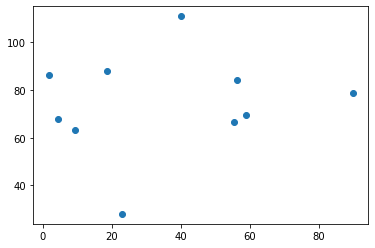

In [100]:
print(avg_distance)
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [101]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array(points)

clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=avg_distance, compute_distances=True)
clustering.fit(X)

AgglomerativeClustering(compute_distances=True,
                        distance_threshold=46.80149414881192, n_clusters=None)

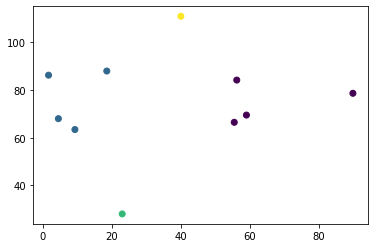

In [102]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.show()

In [103]:
import pandas as pd

df = pd.read_csv('test.csv')
X = np.array([df.x,df.y]).transpose()

In [104]:
distances = [dist(p1, p2) for p1, p2 in combinations(X, 2)]
avg_distance = sum(distances) / len(distances)
print(len(df.x), avg_distance)

229 113.08678180929107


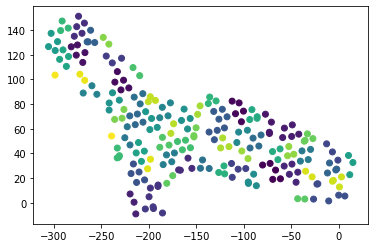

66


In [105]:
clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=20, compute_distances=True)
clustering.fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.show()
print(max(clustering.labels_))

214


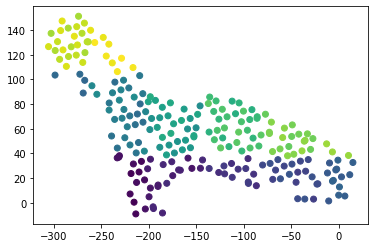

<Figure size 640x480 with 0 Axes>

In [106]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=1).fit(X)
print(max(clustering.labels_))
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.figure(figsize=(8,6), dpi=80)
plt.show()

In [108]:
from scipy.spatial import KDTree

tree = KDTree(X)
the_pt = X[11]
distance, closest = tree.query(the_pt,k=2,workers=-1)

print(distance, closest)
print(the_pt, X[closest[1]])
print(dist(the_pt, X[closest[1]]))

[0.         8.35798592] [11 24]
[-203.58987427   -4.94668579] [-195.41705322   -3.19713593]
8.35798591557602


#### Algorithm
1. Find the mean distance of each closest points in the coordinate system
2. Group clusters that are smaller than the (1).
3. For each Group Cluster
    - if n less than 2 pts, append to coordinate.
    - else append the pt with the highest confidence to coordinate.


In [20]:
from scipy.spatial import KDTree
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit 

df = pd.read_csv('test.csv')
X = np.array([df.x,df.y,df.h]).transpose()
print(X.shape)
X = X[:,0:2]
print(X.shape)

(229, 3)
(229, 2)


(229, 3)
7.296443974697518


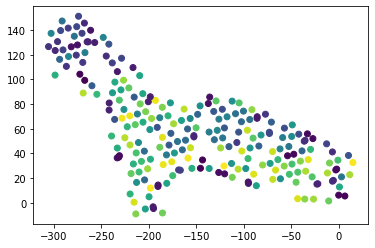

max 9.75 pts in cluster [[-267.29785156   99.22657013    9.75      ]
 [-272.39648438  104.1753006     9.01      ]]
[9.75 9.01]
center [-267.29785156   99.22657013]
max 9.1 pts in cluster [[-145.63034058   28.04484558    9.06      ]
 [-143.43093872   34.74312592    9.1       ]]
[9.06 9.1 ]
center [-145.63034058   28.04484558]
max 7.890000000000001 pts in cluster [[ 6.20410156  5.55062103  6.73      ]
 [-0.29415894  6.2504425   7.89      ]]
[6.73 7.89]
center [6.20410156 5.55062103]
max 10.95 pts in cluster [[-47.50653076  39.39192963  10.95      ]
 [-54.05480957  38.14225006  10.52      ]]
[10.95 10.52]
center [-47.50653076  39.39192963]
max 9.56 pts in cluster [[-27.41189575  52.03868866   9.29      ]
 [-33.16036987  55.88768768   9.56      ]]
[9.29 9.56]
center [-27.41189575  52.03868866]
max 10.83 pts in cluster [[-3.34332275 26.64520264 10.83      ]
 [-2.39358521 27.34502411 10.36      ]]
[10.83 10.36]
center [-3.34332275 26.64520264]
max 7.21 pts in cluster [[-231.38244629   37.042

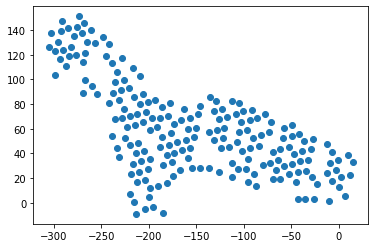

In [52]:
X = np.array([df.x,df.y,df.h]).transpose()
# It changes. We need to cluster without losing the information of the 3rd dimensiion whhhhhhile not using it.
tree = KDTree(X[:,0:2]) # Get x and y here # Location1
print(X.shape)
total_dist = 0
for i in range(len(X)):
    distance , closest = tree.query(X[i,0:2], k=2, workers=-1) # Location2
    total_dist+=distance[1]
mean_dist = total_dist/len(X)
print(mean_dist)

clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=mean_dist, compute_distances=True)
clustering.fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.show()


true_coordinates = []
for i in range(max(clustering.labels_)):
    each_cluster = np.where(clustering.labels_==i)[0]
    n = len(each_cluster)
    if n<2:
        true_coordinates.append(X[each_cluster[0]][0:2])
    else:
        pts_in_cluster = [X[ind] for ind in each_cluster]
        pts_in_cluster = np.vstack(pts_in_cluster)
        max_pred = np.amax(pts_in_cluster,axis=0)[2]
        print("max",max_pred,"pts in cluster",pts_in_cluster)
        print(pts_in_cluster[:,2])
        center = pts_in_cluster[np.where(pts_in_cluster[:,2].max())][0][0:2]
        print("center", center)
        #center = np.mean(pts_in_cluster, axis=0)
        #print("previous format", center)
        true_coordinates.append(center)


true_coordinates = np.vstack(true_coordinates)
plt.scatter(true_coordinates[:,0],true_coordinates[:,1])
#plt.show()
#print(len(true_coordinates))
print('number of clusters',max(clustering.labels_))
print(X.shape)

## Speed Optimization
From for loop to numpy 

In [59]:
def func1():
    true_coordinates = np.zeros((max(clustering.labels_),2))
    for i in range(max(clustering.labels_)):
        each_cluster = np.where(clustering.labels_==i)[0]
        n = len(each_cluster)
        if n<2:
            true_coordinates[i] = (X[each_cluster[0]])
        else:
            pts_in_cluster = [X[ind] for ind in each_cluster]
            pts_in_cluster = np.vstack(pts_in_cluster)
            center = np.mean(pts_in_cluster, axis=0)
            true_coordinates[i]= center

timeit.timeit(lambda:func1(),number=100000)
func1()

In [58]:
def func2():
    true_coordinates = []
    for i in range(max(clustering.labels_)):
        each_cluster = np.where(clustering.labels_==i)[0]
        n = len(each_cluster)
        if n<2:
            true_coordinates.append(X[each_cluster[0]])
        else:
            pts_in_cluster = [X[ind] for ind in each_cluster]
            pts_in_cluster = np.vstack(pts_in_cluster)
            center = np.mean(pts_in_cluster, axis=0)
            true_coordinates.append(center)
    true_coordinates = np.vstack(true_coordinates)

timeit.timeit(lambda:func2(),number=100000)

68.54426385699844

In [11]:
from multiprocessing import Process, Manager, Pool

def dothing(L, i):  # the managed list `L` passed explicitly.
    L.append("anything")


with Manager() as manager:
    L = manager.list()  # <-- can be shared between processes.
    processes = []
    with Pool(processes=8) as pool:
        for i in range(20000):
            p = Process(target=dothing, args=(L,i))  # Passing the list
            p.start()
            processes.append(p)
        for p in processes:
            p.join()

In [ ]:
L = []
for i in range(20000):
    L.append("anything")